In [1]:
import pandas as pd
from scipy import stats as sps
import seaborn as sns
sns.set_theme()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from unidecode import unidecode
from sklearn.impute import KNNImputer
plt.style.use('seaborn')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 40
pd.options.display.float_format = '{:,.2f}'.format

C:\Users\48504\AppData\Local\Temp\ipykernel_23900\3963498875.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
URL = "oto_dom_wroclaw_30_10_2023"

In [3]:
#Wczytanie danych
df = pd.read_csv(URL, sep=",", encoding="utf-8")

In [4]:
#Wyświetlenie 5 pierwszych wierszy
df.head()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
0,3 pokoje z zielonym tarasem i balkonem + MP,759000,"['Maślice', 'Fabryczna', 'Wrocław', 'dolnośląs...","61,83",12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter/2,"balkon, taras",Zapytaj,garaż/miejsce parkingowe,kotłownia,wtórny,prywatny,2019,blok,plastikowe,tak,internet,"drzwi / okna antywłamaniowe, teren zamknięty, ...","zmywarka, lodówka, meble, piekarnik, kuchenka,...",brak informacji,brak informacji,Mam przyjemność przedstawić Państwu ofertę spr...
1,Maślicka 166 C | mieszkanie K2_2,616161,"['ul. Maślicka 166', 'Maślice', 'Fabryczna', '...","67,71",9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter/2,ogródek,Zapytaj,garaż/miejsce parkingowe,gazowe,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,Kancelaria Insolwencyjna sp. z o.o. we Wrocław...
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000,"['Bezpieczna okolice', 'Różanka', 'Psie Pole',...","57,7",9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4/4,Zapytaj,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,1980,blok,plastikowe,nie,"internet, telefon","drzwi / okna antywłamaniowe, domofon / wideofon",meble,"piwnica, oddzielna kuchnia",brak informacji,Trzy pokoje w pełnym rozkładzie!Możliwość prze...
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000,"['ul. marsz. Józefa Piłsudskiego', 'Przedmieśc...",40,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3/4,balkon,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,1969,blok,brak informacji,tak,"internet, telefon",brak informacji,meble,"piwnica, oddzielna kuchnia",brak informacji,Do sprzedania duża kawalerka z balkonem w cent...
4,"Mieszkanie, 61 m², Wrocław",633000,"['Tarnogaj', 'Krzyki', 'Wrocław', 'dolnośląskie']",61,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2/4,balkon,Zapytaj,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2022,apartamentowiec,plastikowe,tak,brak informacji,system alarmowy,brak informacji,piwnica,cegła,| Drzwi wejściowe w najwyższej klasie - C - od...


In [5]:
#Wyświetlenie 5 ostatnich wierszy
df.tail()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
7840,Mieszkanie trzypokojowe w rewelacyjnej lokaliz...,815005,"['ul. Wesoła', 'Huby', 'Krzyki', 'Wrocław', 'd...","70,87",11500,3,https://www.otodom.pl/pl/oferta/mieszkanie-trz...,pełna własność,do zamieszkania,1/3,balkon,Zapytaj,Zapytaj,gazowe,wtórny,prywatny,1906,kamienica,plastikowe,nie,"telewizja kablowa, internet, telefon",domofon / wideofon,"zmywarka, lodówka, meble, piekarnik, kuchenka,...","piwnica, oddzielna kuchnia",cegła,Sprzedam trzypokojowe mieszkanie w bardzo dobr...
7841,"Okazja, ul. Rydygiera 82m2, 4 pokoje, 2 łazienki!",1222000,"['ul. Ludwika Rydygiera', 'Nadodrze', 'Śródmie...",82,14902,4,https://www.otodom.pl/pl/oferta/okazja-ul-rydy...,pełna własność,do zamieszkania,3/3,balkon,1 000 zł,Zapytaj,Zapytaj,wtórny,biuro nieruchomości,2011,brak informacji,plastikowe,nie,brak informacji,brak informacji,meble,brak informacji,brak informacji,Zapraszamy do odkrycia wyjątkowej oferty miesz...
7842,ładne 2 pokojowe,489000,"['ul. Jedności Narodowej', 'Ołbin', 'Śródmieśc...",54,9056,2,https://www.otodom.pl/pl/oferta/ladne-2-pokojo...,pełna własność,do zamieszkania,4/5,Zapytaj,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,1930,kamienica,brak informacji,nie,brak informacji,brak informacji,brak informacji,brak informacji,cegła,Do sprzedaży śliczne 2 pokojowe mieszkanie o p...
7843,Penthouse z widokiem na miasto - Wysoki Standard!,1488000,"['ul. Długa', 'Nadodrze', 'Śródmieście', 'Wroc...","79,19",18790,2,https://www.otodom.pl/pl/oferta/penthouse-z-wi...,pełna własność,do zamieszkania,8/8,taras,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,2010,blok,brak informacji,tak,internet,"teren zamknięty, monitoring / ochrona",brak informacji,pom. użytkowe,silikat,Wrocław. Długa. Dwupokojowy apartament z taras...
7844,Lokal mieszkalny i działka,"471850,40","['Przedmieście Świdnickie', 'Stare Miasto', 'W...","55,45",8509,3,https://www.otodom.pl/pl/oferta/lokal-mieszkal...,Zapytaj,Zapytaj,parter,Zapytaj,Zapytaj,Zapytaj,Zapytaj,wtórny,prywatny,brak informacji,blok,brak informacji,nie,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,Syndyk Izabeli Sowińskiej osoby fizycznej niep...


In [6]:
#Wyświetlenie 10 losowych wierszy
df.sample(10)

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
6822,"Nowe mieszkanie, 2.E.2.1",878900,"['ul. Maślicka', 'Maślice', 'Fabryczna', 'Wroc...","95,91",9164,4,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,pełna własność,do wykończenia,2/2,balkon,Zapytaj,Zapytaj,miejskie,pierwotny,deweloper,2023,blok,plastikowe,nie,brak informacji,brak informacji,brak informacji,dwupoziomowe,silikat,Przedmiotem sprzedaży jest nowe mieszkanie z a...
7324,Apartament przy ul. Grunwaldzkiej,850000,"['ul. Grunwaldzka', 'Ołbin', 'Śródmieście', 'W...","100,98",8418,3,https://www.otodom.pl/pl/oferta/apartament-prz...,Zapytaj,do zamieszkania,4/4,Zapytaj,500 zł,Zapytaj,gazowe,wtórny,biuro nieruchomości,1928,kamienica,brak informacji,nie,brak informacji,domofon / wideofon,"meble, lodówka, zmywarka",brak informacji,brak informacji,"Do sprzedania jest przestronne, reprezentacyjn..."
392,"Mieszkanie, 49,70 m², Wrocław",559000,"['Karłowice', 'Psie Pole', 'Wrocław', 'dolnośl...","49,7",11247,2,https://www.otodom.pl/pl/oferta/mieszkanie-49-...,pełna własność,Zapytaj,parter/3,taras,600 zł,Zapytaj,miejskie,wtórny,biuro nieruchomości,2010,apartamentowiec,plastikowe,tak,"telewizja kablowa, internet","drzwi / okna antywłamaniowe, domofon / wideofo...",meble,brak informacji,brak informacji,Mam na sprzedaż mieszkanie z ogromnym potencja...
3528,"Mieszkanie 34,60, 2 pokoje, T. Kościuszki",455000,"['ul. Tadeusza Kościuszki', 'Przedmieście Oław...","34,6",13150,2,https://www.otodom.pl/pl/oferta/mieszkanie-34-...,pełna własność,do zamieszkania,5/6,balkon,400 zł,Zapytaj,miejskie,wtórny,biuro nieruchomości,2002,blok,plastikowe,nie,brak informacji,"drzwi / okna antywłamaniowe, domofon / wideofon","zmywarka, lodówka, meble, piekarnik, kuchenka,...",brak informacji,inne,Informacje ogólne: Przedstawiona nieruchomo...
4373,"2 Pok.| 45,35m2 | ul. Jaracza | 2 Balkony | Bk2%!",595000,"['Ołbin', 'Śródmieście', 'Wrocław', 'dolnośląs...","45,35",13120,2,https://www.otodom.pl/pl/oferta/2-pok-45-35m2-...,pełna własność,Zapytaj,3/4,balkon,340 zł,Zapytaj,gazowe,wtórny,biuro nieruchomości,2003,brak informacji,plastikowe,nie,"telewizja kablowa, internet","drzwi / okna antywłamaniowe, monitoring / ochrona",brak informacji,brak informacji,brak informacji,Na sprzedaż przestronne mieszkanie 2 pokojowe ...
2365,"Kawalerka W Centrum , Kamienica 330cm wysokość!",508375,"['ul. Hugona Kołłątaja', 'Przedmieście Świdnic...","29,05",17500,1,https://www.otodom.pl/pl/oferta/kawalerka-w-ce...,pełna własność,do wykończenia,3/6,Zapytaj,Zapytaj,Zapytaj,miejskie,pierwotny,biuro nieruchomości,2023,kamienica,brak informacji,tak,internet,domofon / wideofon,brak informacji,brak informacji,cegła,OGŁOSZENIE BEZPOŚREDNIO OD WŁAŚCICIELA! Bez pr...
3099,Nowe osiedle/2 pokoje/Dużo zieleni/Winda,540000,"['ul. Księska', 'Księże', 'Krzyki', 'Wrocław',...","48,5",11134,2,https://www.otodom.pl/pl/oferta/nowe-osiedle-2...,pełna własność,Zapytaj,1/2,balkon,Zapytaj,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2025,brak informacji,plastikowe,tak,brak informacji,brak informacji,brak informacji,oddzielna kuchnia,silikat,2 pokoje/ Nowoczesne osiedle/ Dużo zieleni/Win...
2130,GOTOWE 2M na START_NA WYNAJEM|Komunikacja_zieleń,549000,"['Tarnogaj', 'Krzyki', 'Wrocław', 'dolnośląskie']",36,15250,2,https://www.otodom.pl/pl/oferta/gotowe-2m-na-s...,pełna własność,do zamieszkania,parter/4,"ogródek, taras",460 zł,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2022,blok,plastikowe,tak,internet,"drzwi / okna antywłamaniowe, teren zamknięty, ...","zmywarka, lodówka, meble, piekarnik, kuchenka,...",brak informacji,inne,Przedstawiam Państwu na sprzedaż klimatyczne N...
4209,NOWY ETAP|Tylko2 takie mieszkania|Kredyt2%|Spr...,

In [7]:
#Rozmiar df przed usunięciem duplikatów
df.shape

(7845, 26)

In [8]:
#Usunięcie duplikatów
df = df.drop_duplicates()

In [9]:
#Rozmiar df po usunięciu duplikatów
df.shape

(7235, 26)

In [10]:
#Informacje o ilości wierszy, o klumnach, ilości niezerowych wartości w każdej z kolumn oraz o typie danych w kolumnie
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7235 entries, 0 to 7844
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   titles                  7235 non-null   object
 1   prices                  7235 non-null   object
 2   location                7235 non-null   object
 3   area                    7235 non-null   object
 4   price per square meter  7235 non-null   int64 
 5   numbers_of_rooms        7235 non-null   object
 6   urls                    7235 non-null   object
 7   property_ownership      7235 non-null   object
 8   condition_of_property   7235 non-null   object
 9   floor                   7235 non-null   object
 10  balcon_garden_terrace   7235 non-null   object
 11  amount_of_rent          7235 non-null   object
 12  parking_space           7235 non-null   object
 13  type_of_heating         7235 non-null   object
 14  primary_secondary       7235 non-null   object
 15  sell

In [11]:
#Wyświetlenie wierszy które nie mają ceny
df[df["price per square meter"].isnull() | df["prices"].isnull()]["titles"].count()

0

In [12]:
#Usunięcie wierszy bez ceny za metr kwadratowy
df = df.drop(df[df["price per square meter"].isnull() | df["prices"].isnull()].index)
df.shape

(7235, 26)

In [13]:
df = df.reset_index(drop=True)

In [14]:
#Sprawdzenie ilości brakujących wartości w każdej z kolumn
df.isnull().sum()

titles                    0
prices                    0
location                  0
area                      0
price per square meter    0
numbers_of_rooms          0
urls                      0
property_ownership        0
condition_of_property     0
floor                     0
balcon_garden_terrace     0
amount_of_rent            0
parking_space             0
type_of_heating           0
primary_secondary         0
seller                    0
year_of_construction      0
type_of_development       0
window                    0
lift                      0
utilities                 0
security                  0
home_furnishings          0
additional_info           0
bulding_material          0
describe                  0
dtype: int64

In [15]:
[cname for cname in df.columns]

['titles',
 'prices',
 'location',
 'area',
 'price per square meter',
 'numbers_of_rooms',
 'urls',
 'property_ownership',
 'condition_of_property',
 'floor',
 'balcon_garden_terrace',
 'amount_of_rent',
 'parking_space',
 'type_of_heating',
 'primary_secondary',
 'seller',
 'year_of_construction',
 'type_of_development',
 'window',
 'lift',
 'utilities',
 'security',
 'home_furnishings',
 'additional_info',
 'bulding_material',
 'describe']

In [16]:
for cname in ["parking_space", "lift", "seller", "numbers_of_rooms", "utilities"]:
    print(f"Unikatowe wartości w kolumnie : '{cname}'", end="\n\n")
    print(df[cname].value_counts())
    print("--------------------------------", end="\n\n")

Unikatowe wartości w kolumnie : 'parking_space'

garaż/miejsce parkingowe    4179
Zapytaj                     3056
Name: parking_space, dtype: int64
--------------------------------

Unikatowe wartości w kolumnie : 'lift'

tak                3396
nie                2708
brak informacji    1131
Name: lift, dtype: int64
--------------------------------

Unikatowe wartości w kolumnie : 'seller'

biuro nieruchomości     5514
brak informacji         1131
prywatny                 462
deweloper                128
Name: seller, dtype: int64
--------------------------------

Unikatowe wartości w kolumnie : 'numbers_of_rooms'

3              2756
2              2381
4              1170
1               705
5               174
6                30
7                11
9                 4
więcejniż10       3
8                 1
Name: numbers_of_rooms, dtype: int64
--------------------------------

Unikatowe wartości w kolumnie : 'utilities'

brak informacji                                            

In [17]:
#Wyświetlenie ilosci brakujących wierszy dla każdej z kolumn
{cname: df[cname].isnull().sum() for cname in df.columns}
#df["condition_of_property"].isnull().sum()

{'titles': 0,
 'prices': 0,
 'location': 0,
 'area': 0,
 'price per square meter': 0,
 'numbers_of_rooms': 0,
 'urls': 0,
 'property_ownership': 0,
 'condition_of_property': 0,
 'floor': 0,
 'balcon_garden_terrace': 0,
 'amount_of_rent': 0,
 'parking_space': 0,
 'type_of_heating': 0,
 'primary_secondary': 0,
 'seller': 0,
 'year_of_construction': 0,
 'type_of_development': 0,
 'window': 0,
 'lift': 0,
 'utilities': 0,
 'security': 0,
 'home_furnishings': 0,
 'additional_info': 0,
 'bulding_material': 0,
 'describe': 0}

In [18]:
df_copy = df.copy()

for column in df_copy.columns:
    df_copy.loc[df_copy[column] == "brak informacji", column] = None
    df_copy.loc[df_copy[column] == "Zapytaj", column] = None

In [19]:
#Liczba wierszy w których nie brakuje żadnego atrybutu
df_copy[~df_copy.isnull().any(axis=1)]["prices"].count()

72

In [20]:
#Sprawdzenie ilości brakujących wartości w każdej z kolumn
pd.DataFrame(df_copy.isnull().sum()).T
#pd.DataFrame(df_copy.isnull().sum()).T

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
0,0,0,0,0,0,0,0,1539,2422,122,1719,4278,3056,2390,1131,1131,2070,2423,3620,1131,4520,3407,5620,4004,4049,0


In [21]:
#Sprawdzenie jaką część stanowią braki w kazdej kolumnie
pd.DataFrame(round(df_copy.isnull().sum() * 100 / len(df),1)).T
#pd.DataFrame(round(df_copy.isnull().sum() * 100 / len(df),1))

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.30,33.50,1.70,23.80,59.10,42.20,33.00,15.60,15.60,28.60,33.50,50.00,15.60,62.50,47.10,77.70,55.30,56.00,0.00


In [22]:
#Liczba wierszy w których nie brakuje żadnego atrybutu
df_copy[~df_copy.isnull().any(axis=1)]["prices"].count()

72

In [23]:
#Liczba wierszy w których nie brakuje żadnego atrybutu
df_copy[~df_copy.isnull().any(axis=1)]["prices"].count()

72

In [24]:
df.describe()

,price per square meter
count,"7,235.00"
mean,"12,740.67"
std,"3,537.28"
min,76.00
25%,"10,818.00"
50%,"12,219.00"
75%,"13,800.00"
max,"123,800.00"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7235 entries, 0 to 7234
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   titles                  7235 non-null   object
 1   prices                  7235 non-null   object
 2   location                7235 non-null   object
 3   area                    7235 non-null   object
 4   price per square meter  7235 non-null   int64 
 5   numbers_of_rooms        7235 non-null   object
 6   urls                    7235 non-null   object
 7   property_ownership      7235 non-null   object
 8   condition_of_property   7235 non-null   object
 9   floor                   7235 non-null   object
 10  balcon_garden_terrace   7235 non-null   object
 11  amount_of_rent          7235 non-null   object
 12  parking_space           7235 non-null   object
 13  type_of_heating         7235 non-null   object
 14  primary_secondary       7235 non-null   object
 15  sell

# 1. Zmienna celu (zmienna zależna, target) "prices":

In [26]:
#df["prices"] = df["prices"].str.replace(",",".").apply(lambda x: float(x) if x != "Zapytajocenę" else None)
df["prices"] = df["prices"].str.replace(",",".").astype(float)

ValueError: could not convert string to float: '120000EUR'

In [27]:
mask = df["prices"].str.contains(r'EUR', na=True)
mask.sum()  # Sprawdzenie ile wierszy zawiera cene w euro

2

In [28]:
#Skoro tylko 2 to usuwamy
index_to_remove = df.loc[mask].index
df = df.drop(labels= index_to_remove, axis=0 )
df = df.reset_index(drop=True)

In [29]:
df["prices"] = df["prices"].str.replace(",",".").astype(float)

In [30]:
df[["prices"]].describe()

,prices
count,"7,233.00"
mean,"745,401.44"
std,"389,716.63"
min,"228,900.00"
25%,"553,536.00"
50%,"678,706.00"
75%,"829,000.00"
max,"9,500,000.00"


## 2. Area

In [31]:
#Zmiana typu zmiennej niezależnej "area" w celu tworzenia wykresów
df["area"] = df["area"].str.replace(",",".").str.replace("\xa0","").astype(float)

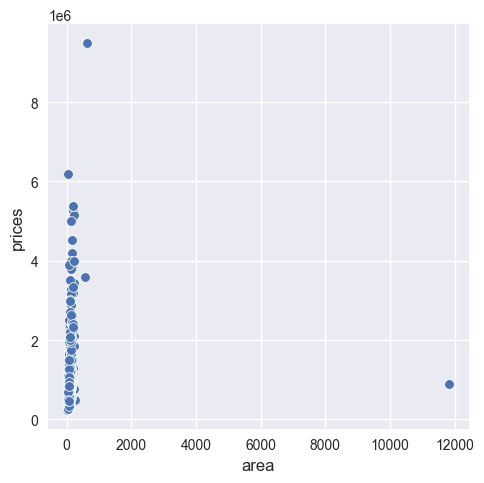

In [32]:
sns.relplot(
    data=df,
    x="area", y="prices",
)

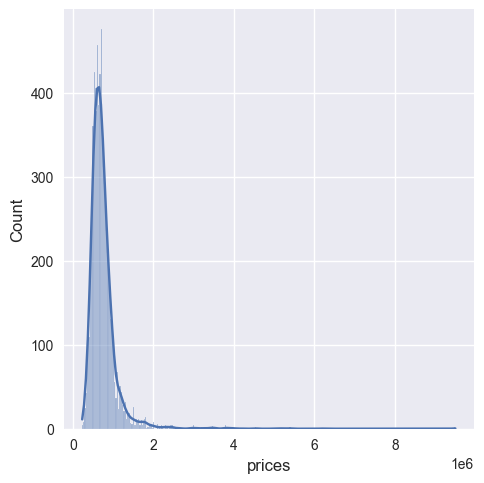

In [33]:
sns.displot(data=df, x="prices",  kde=True)

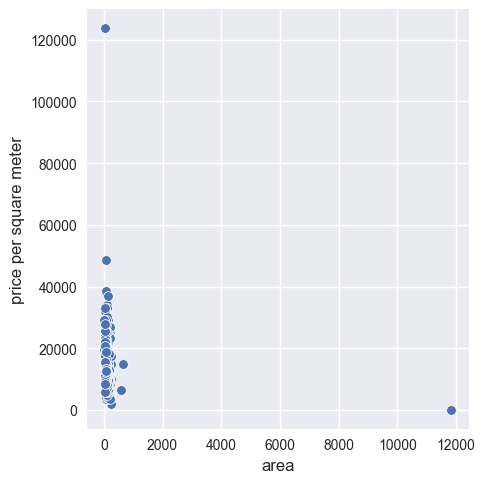

In [34]:
sns.relplot(
    data=df,
    x="area", y="price per square meter",
)

In [35]:
# Powyższe wykresy wskazują na występowanie wartości odstających wiec odfiltrujemy dane

In [36]:
def filter_IQR_rule(df_to_filter, column_name: str=None):
    Q1 = df_to_filter[column_name].quantile(0.25)
    Q3 = df_to_filter[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - 1.5 * IQR)
    upper_bound = round(Q3 + 1.5 * IQR)
    outliers = ((df_to_filter[column_name] < lower_bound) | (df_to_filter[column_name] > upper_bound))    
    perc_of_removed = round((100*outliers.sum())/df_to_filter.shape[0], 2)
    print(f"Usunięto: {outliers.sum()} wierszy stanowiących {perc_of_removed}% danych, zawierajacych odstające wartości w kolumnie '{column_name}' poniżej {lower_bound} oraz powyżej {upper_bound} ")
    df_result = df_to_filter.loc[~outliers]
    return df_result

In [37]:
df_filtered = filter_IQR_rule(df, column_name = "area")
df_filtered = filter_IQR_rule(df_filtered, column_name = "price per square meter")
df_filtered = filter_IQR_rule(df_filtered, column_name = "prices")

Usunięto: 287 wierszy stanowiących 3.97% danych, zawierajacych odstające wartości w kolumnie 'area' poniżej 8 oraz powyżej 107 
Usunięto: 429 wierszy stanowiących 6.18% danych, zawierajacych odstające wartości w kolumnie 'price per square meter' poniżej 6574 oraz powyżej 18098 
Usunięto: 170 wierszy stanowiących 2.61% danych, zawierajacych odstające wartości w kolumnie 'prices' poniżej 178960 oraz powyżej 1165732 


In [38]:
df_filtered = filter_IQR_rule(df, column_name = "area")

Usunięto: 287 wierszy stanowiących 3.97% danych, zawierajacych odstające wartości w kolumnie 'area' poniżej 8 oraz powyżej 107 


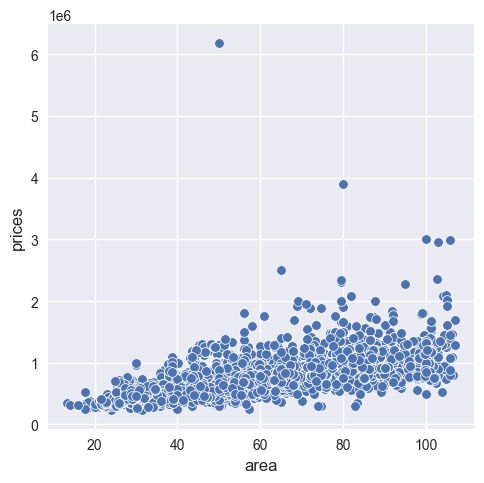

In [39]:
sns.relplot(
    data=df_filtered ,
    x="area", y="prices",
)

In [40]:
df_filtered = filter_IQR_rule(df_filtered, column_name = "prices")

Usunięto: 280 wierszy stanowiących 4.03% danych, zawierajacych odstające wartości w kolumnie 'prices' poniżej 174266 oraz powyżej 1175823 


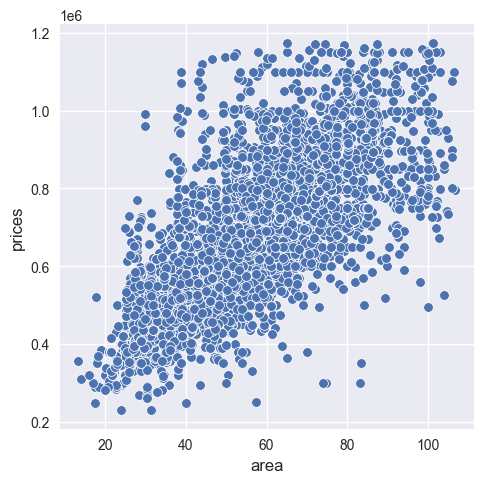

In [41]:
sns.relplot(
    data=df_filtered ,
    x="area", y="prices",
)

In [42]:
df_filtered = filter_IQR_rule(df_filtered, column_name = "price per square meter")

Usunięto: 384 wierszy stanowiących 5.76% danych, zawierajacych odstające wartości w kolumnie 'price per square meter' poniżej 6730 oraz powyżej 17642 


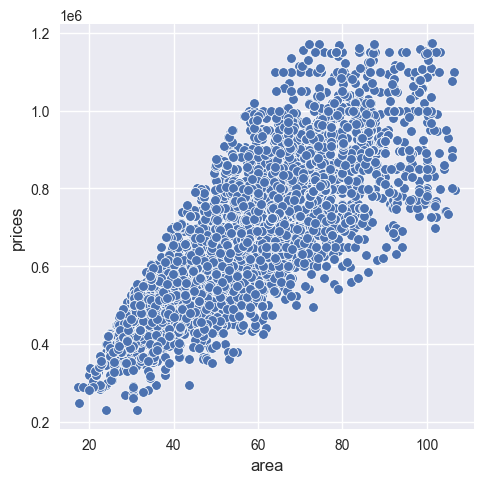

In [43]:
sns.relplot(
    data=df_filtered ,
    x="area", y="prices",
)

# Patrząc na powyższe wykresy zastanawiam się czy nie przesadziłem odfiltrowując dane ( chyba wystarczy odfiltrowanie ze wzgędu na powierzchnie i cene)

In [44]:
# df_filtered = filter_IQR_rule(df, column_name = "area")
# df_filtered = filter_IQR_rule(df_filtered, column_name = "prices")

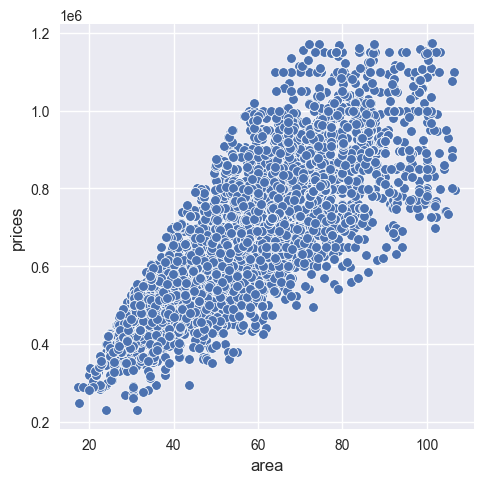

In [45]:
sns.relplot(
    data=df_filtered ,
    x="area", y="prices",
)

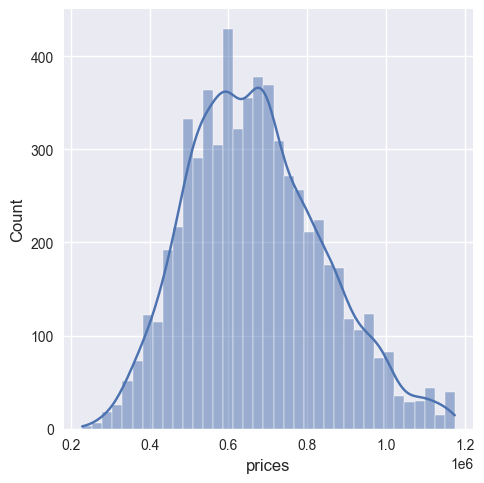

In [46]:
sns.displot(data=df_filtered, x="prices",  kde=True)

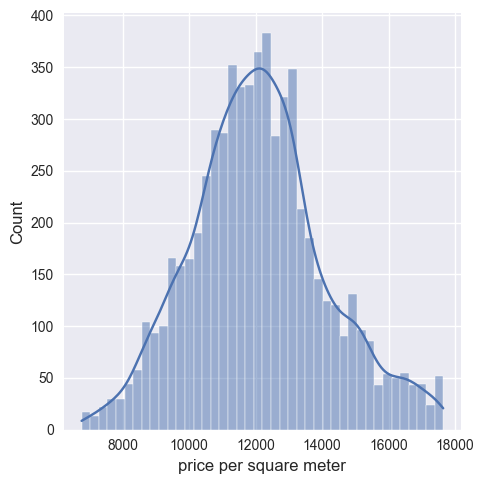

In [47]:
sns.displot(data=df_filtered, x="price per square meter",  kde=True)

# Dalsze oczyszczanie danych

### Numbers_of_rooms

In [48]:
df_filtered["numbers_of_rooms"].value_counts()

3    2586
2    2129
4     913
1     552
5      88
6      12
7       2
Name: numbers_of_rooms, dtype: int64

In [49]:
df_filtered["numbers_of_rooms"] = df_filtered["numbers_of_rooms"].astype(int)
#df_filtered["numbers_of_rooms"] = pd.to_numeric(df_filtered["numbers_of_rooms"], errors='coerce', downcast='signed')

### Floor

In [50]:
df_filtered["floor"].value_counts()

1/4         360
1/2         347
2/4         338
3/4         334
parter/4    323
           ... 
> 10/10       1
4/12          1
2/12          1
suterena      1
7/17          1
Name: floor, Length: 125, dtype: int64

In [51]:
#Oczyszczenie kolumny
#df_filtered["floor"] = df_filtered["floor"].str.replace("> ","").str.replace("parter", "0").str.replace("suterena", "-4").str.replace("poddasze", "-2").astype(str)
# Na razie jednak nie oczyszczam  w ten sposób bo chce zachować informacje takie jakie one są

In [52]:
def get_floor_number(floor_describe):
    if floor_describe != "None":
        floor_info_list = floor_describe.split("/")
        #print(len(floor_info_list))
        if len(floor_info_list) >= 2:
            floor = floor_info_list[0]
            number_of_floors = floor_info_list[1]
        else:
            floor = floor_info_list[0]
            number_of_floors = None
    else:
        floor = None
        number_of_floors = None
    
    #print(floor, number_of_floors)
    return floor, number_of_floors

In [53]:
#Podział infomracji w kolumnie na dwie kolumny 
df_filtered[["floor", "number_of_floors"]] = df_filtered["floor"].apply(lambda x: pd.Series(get_floor_number(x)))

In [54]:
df_filtered["floor"].value_counts()

1           1459
2           1207
parter      1168
3            926
4            679
5            297
6            202
Zapytaj       94
7             94
8             60
> 10          40
10            30
9             22
suterena       3
poddasze       1
Name: floor, dtype: int64

### Ćwiczyłem zamiane tej kolumny na numeryczną teraz spróbuje potraktować ją jako etykiety i wykonam na niej OHE

### Amount of rent

In [55]:
df_filtered["amount_of_rent"].value_counts()

Zapytaj      3753
500 zł        235
600 zł        193
400 zł        181
700 zł        142
             ... 
1 114 zł        1
492 zł          1
436,70 zł       1
922 zł          1
495 zł          1
Name: amount_of_rent, Length: 301, dtype: int64

In [56]:
df_filtered["amount_of_rent"] = df_filtered["amount_of_rent"].str.replace(" zł","").str.replace(" ", "").str.replace(",", ".").astype(float)

ValueError: could not convert string to float: 'Zapytaj'

In [57]:
df_filtered["amount_of_rent"] = df_filtered["amount_of_rent"].str.replace(" zł","").str.replace(" ", "").str.replace(",", ".")

In [58]:
 df_filtered["amount_of_rent"] = pd.to_numeric(df_filtered["amount_of_rent"], errors="coerce")

In [59]:
df_filtered["amount_of_rent"].sample(10)

1681   600.00
5263      NaN
4699      NaN
6568   250.00
2963      NaN
7093      NaN
4411      NaN
1232      NaN
2820   380.00
2847   430.00
Name: amount_of_rent, dtype: float64

###  W tej kolumnie brakuje ok 60% danych zastanowić sie czy jej sobie nie odpuścić 

In [60]:
df_filtered["year_of_construction"].value_counts()

brak informacji    1828
2023               1184
2024                602
2022                268
2025                263
                   ... 
1870                  1
1952                  1
1962                  1
1903                  1
1964                  1
Name: year_of_construction, Length: 125, dtype: int64

In [61]:
((df_filtered["primary_secondary"] == "pierwotny") & (df_filtered["year_of_construction"] == "brak informacji")).sum()

367

In [62]:
#Dla rynku pierwotnego uzupełnienie roku na 2023
df_filtered.loc[((df_filtered["primary_secondary"] == "pierwotny") & (df_filtered["year_of_construction"] == "brak informacji")), "year_of_construction"] = "2023"

In [63]:
df_filtered["year_of_construction"] = pd.to_numeric(df_filtered["year_of_construction"], errors='raise')

ValueError: Unable to parse string "brak informacji" at position 1

In [64]:
pd.to_numeric(df_filtered["year_of_construction"], errors="coerce").value_counts()

2,023.00    1551
2,024.00     602
2,022.00     268
2,025.00     263
1,980.00     169
            ... 
1,903.00       1
1,953.00       1
1,870.00       1
1,962.00       1
1,964.00       1
Name: year_of_construction, Length: 124, dtype: int64

In [65]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") > 2030]["year_of_construction"]

2986    20223
3625    20223
Name: year_of_construction, dtype: object

In [66]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") > 2030, "year_of_construction"] = 2023

In [67]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 1900 , "year_of_construction"] = "x<1900"

In [68]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 1990, "year_of_construction"] = "1900<x<1990"

In [69]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 2010, "year_of_construction"] = "1990<x<2010"

In [70]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 2018, "year_of_construction"] = "2010<x<2018"

In [71]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") >= 2018, "year_of_construction"] = "2018<=x"

In [72]:
df_filtered["year_of_construction"].value_counts()

2018<=x            2892
brak informacji    1461
1900<x<1990        1063
1990<x<2010         422
2010<x<2018         421
x<1900               23
Name: year_of_construction, dtype: int64

In [73]:
df_filtered.describe()

,prices,area,price per square meter,numbers_of_rooms,amount_of_rent
count,"6,282.00","6,282.00","6,282.00","6,282.00","2,529.00"
mean,"670,954.86",56.81,"12,098.71",2.67,558.19
std,"171,711.22",16.33,"2,027.57",0.90,328.50
min,"228,900.00",17.50,"6,766.00",1.00,1.00
25%,"544,125.00",45.53,"10,790.00",2.00,400.00
50%,"659,000.00",56.00,"12,002.50",3.00,550.00
75%,"782,145.50",66.61,"13,217.25",3.00,700.00
max,"1,175,000.00",106.68,"17,641.00",7.00,"13,000.00"


In [74]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7232
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   titles                  6282 non-null   object 
 1   prices                  6282 non-null   float64
 2   location                6282 non-null   object 
 3   area                    6282 non-null   float64
 4   price per square meter  6282 non-null   int64  
 5   numbers_of_rooms        6282 non-null   int32  
 6   urls                    6282 non-null   object 
 7   property_ownership      6282 non-null   object 
 8   condition_of_property   6282 non-null   object 
 9   floor                   6282 non-null   object 
 10  balcon_garden_terrace   6282 non-null   object 
 11  amount_of_rent          2529 non-null   float64
 12  parking_space           6282 non-null   object 
 13  type_of_heating         6282 non-null   object 
 14  primary_secondary       6282 non-null   

### location

In [75]:
#Zamiana listy na str i oczyszczenie z niepotrzebnych znaków
df_filtered["location"] = df_filtered["location"].str.replace("[","", regex=True).str.replace("]","", regex=True).str.replace("'","", regex=True)
#Wydzielenie ulic
df_filtered[["location_remain", "district", "city", "province"]] = df_filtered["location"].str.rsplit(", ",n=3, expand=True)

### balcon_garden_terrace

In [76]:
def get_dummy_for(df, column_name):
    df[column_name] = df[column_name].str.replace(", ",",").str.strip()
    df[column_name] = df[column_name].apply(lambda x: unidecode(x) if x is not None else None)
    df[column_name] = df[column_name].str.replace(" ", "_")
    df.loc[df[column_name] == "None", column_name] = np.nan
    df.loc[df[column_name] == "nan", column_name] = np.nan
    df_encoded = df[column_name].str.get_dummies(sep=',').add_prefix(f"{column_name}_dummy_")
    df = pd.concat([df, df_encoded], axis=1)
    return df

In [77]:
df_filtered = get_dummy_for(df_filtered, "balcon_garden_terrace")

### utilites

In [78]:
df_filtered = get_dummy_for(df_filtered, "utilities")

### security

In [79]:
df_filtered = get_dummy_for(df_filtered, "security")

In [80]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7232
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6282 non-null   object 
 1   prices                                      6282 non-null   float64
 2   location                                    6282 non-null   object 
 3   area                                        6282 non-null   float64
 4   price per square meter                      6282 non-null   int64  
 5   numbers_of_rooms                            6282 non-null   int32  
 6   urls                                        6282 non-null   object 
 7   property_ownership                          6282 non-null   object 
 8   condition_of_property                       6282 non-null   object 
 9   floor                                       6282 non-null   object 
 10  balcon_garde

## Zapisanie przefiltrowanych danych

In [81]:
df_filtered.to_csv(f"{URL}_cleaned_up", index=False, sep=",", encoding="utf-8")

# Budowa prostego modelu będącego punktem odniesienia

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn import linear_model

In [83]:
y = df_filtered["prices"]

In [84]:
X = df_filtered[["area", "numbers_of_rooms", "floor", "district"]]
#X = df_filtered[["area"]]
X = df_filtered.drop(["prices", "price per square meter"], axis=1)
X = X.drop(["titles", "urls", "describe", "location", "location_remain", "city", "province","utilities", "balcon_garden_terrace", "security"], axis=1)

In [85]:
# Podział danych na zbiór treningowy i walidacyjny
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [86]:
# Wybór kolumna z niską ilością kategorii  
#categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]
categorical_cols = [cname for cname in X_train_full.columns if  X_train_full[cname].dtype == "object"]
categorical_cols 

['property_ownership',
 'condition_of_property',
 'floor',
 'parking_space',
 'type_of_heating',
 'primary_secondary',
 'seller',
 'year_of_construction',
 'type_of_development',
 'window',
 'lift',
 'home_furnishings',
 'additional_info',
 'bulding_material',
 'number_of_floors',
 'district']

In [87]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int8', 'int32', 'int64', 'float64']]

numerical_cols

['area',
 'numbers_of_rooms',
 'amount_of_rent',
 'balcon_garden_terrace_dummy_Zapytaj',
 'balcon_garden_terrace_dummy_balkon',
 'balcon_garden_terrace_dummy_ogrodek',
 'balcon_garden_terrace_dummy_taras',
 'utilities_dummy_brak_informacji',
 'utilities_dummy_gaz',
 'utilities_dummy_internet',
 'utilities_dummy_kanalizacja',
 'utilities_dummy_prad',
 'utilities_dummy_telefon',
 'utilities_dummy_telewizja_kablowa',
 'utilities_dummy_woda',
 'security_dummy_brak_informacji',
 'security_dummy_domofon_/_wideofon',
 'security_dummy_drzwi_/_okna_antywlamaniowe',
 'security_dummy_monitoring_/_ochrona',
 'security_dummy_rolety_antywlamaniowe',
 'security_dummy_system_alarmowy',
 'security_dummy_teren_zamkniety']

In [88]:
X.columns

Index(['area', 'numbers_of_rooms', 'property_ownership',
       'condition_of_property', 'floor', 'amount_of_rent', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material',
       'number_of_floors', 'district', 'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_terrace_dummy_taras', 'utilities_dummy_brak_informacji',
       'utilities_dummy_gaz', 'utilities_dummy_internet',
       'utilities_dummy_kanalizacja', 'utilities_dummy_prad',
       'utilities_dummy_telefon', 'utilities_dummy_telewizja_kablowa',
       'utilities_dummy_woda', 'security_dummy_brak_informacji',
       'security_dummy_domofon_/_wideofon',
       'security_dummy_drzwi_/_okna_antywlamaniowe',
       'security_dummy_monitoring_/_ochrona',
       'security_dummy_ro

In [89]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

X_train.sample(10)

,property_ownership,condition_of_property,floor,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,home_furnishings,additional_info,bulding_material,number_of_floors,district,area,numbers_of_rooms,amount_of_rent,balcon_garden_terrace_dummy_Zapytaj,balcon_garden_terrace_dummy_balkon,balcon_garden_terrace_dummy_ogrodek,balcon_garden_terrace_dummy_taras,utilities_dummy_brak_informacji,utilities_dummy_gaz,utilities_dummy_internet,utilities_dummy_kanalizacja,utilities_dummy_prad,utilities_dummy_telefon,utilities_dummy_telewizja_kablowa,utilities_dummy_woda,security_dummy_brak_informacji,security_dummy_domofon_/_wideofon,security_dummy_drzwi_/_okna_antywlamaniowe,security_dummy_monitoring_/_ochrona,security_dummy_rolety_antywlamaniowe,security_dummy_system_alarmowy,security_dummy_teren_zamkniety
6364,pełna własność,do wykończenia,6,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,blok,plastikowe,tak,brak informacji,brak informacji,brak informacji,9,Stare Miasto,38.14,2,300.00,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
6930,pełna własność,do wykończenia,1,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,blok,aluminiowe,tak,brak informacji,brak informacji,inne,7,Śródmieście,74.30,4,700.00,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1
2525,Zapytaj,Zapytaj,2,Zapytaj,Zapytaj,pierwotny,biuro nieruchomości,2018<=x,brak informacji,brak informacji,nie,brak informacji,brak informacji,brak informacji,4,Fabryczna,71.22,4,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5079,pełna własność,do wykończenia,parter,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2018<=x,brak informacji,brak informacji,nie,brak informacji,brak informacji,brak informacji,4,Psie Pole,38.40,2,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
44,pełna własność,Zapytaj,1,Zapytaj,miejskie,wtórny,biuro nieruchomości,brak informacji,blok,plastikowe,nie,"kuchenka, pralka","piwnica, oddzielna kuchnia",cegła,4,Krzyki,35.61,1,350.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2379,pełna własność,do wykończenia,4,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,4,Psie Pole,54.53,3,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
104,pełna własność,do zamieszkania,5,Zapytaj,miejskie,wtórny,prywatny,x<1900,blok,plastikowe,tak,"zmywarka, lodówka, meble, piekarnik, kuchenka,...",piwnica,wielka płyta,10,Fabryczna,36.00,2,674.49,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2937,Zapytaj,Zapytaj,5,Zapytaj,miejskie,wtórny,biuro nieruchomości,1900<x<1990,blok,plastikowe,tak,brak informacji,piwnica,brak informacji,8,Śródmieście,38.30,2,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5324,pełna własność,do wykończenia,2,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,4,Psie Pole,66.46,3,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2921,pełna własność,do zamieszkania,6,Zapytaj,miejskie,wtórny,biuro nieruchomości,1990<x<2010,plomba,brak informacji,tak,brak informacji,oddzielna kuchnia,brak informacji,6,Śródmieście,56.00,2,600.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 3921 to 3063
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   property_ownership                          5025 non-null   object 
 1   condition_of_property                       5025 non-null   object 
 2   floor                                       5025 non-null   object 
 3   parking_space                               5025 non-null   object 
 4   type_of_heating                             5025 non-null   object 
 5   primary_secondary                           5025 non-null   object 
 6   seller                                      5025 non-null   object 
 7   year_of_construction                        5025 non-null   object 
 8   type_of_development                         5025 non-null   object 
 9   window                                      5025 non-null   object 
 10  lift     

In [91]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'constant')),
    ('std_scaler', StandardScaler())
])

In [92]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [93]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [94]:
model =  linear_model.LinearRegression()

In [95]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

In [96]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'numbers_of_rooms',
                                                   'amount_of_rent',
                                                   'balcon_garden_terrace_dummy_Zapytaj',
                                                   'balcon_garden_terrace_dummy_balkon',
                                                   'balcon_garden_terrace_dummy_ogrodek',
                                                   'balcon_garden_terrac...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_ownership',
                                                   'condition_of_property',
                                                   'floor', 'parking_space',
                                                   'type_of_heating',
                                                   'primary_secondary',
                                                   'seller',
                                                   'year_of_construction',
                                                   'type_of_development',
                                                   'window', 'lift',
                                                   'home_furnishings',
                                                   'additional_info',
                                                   'bulding_material',
                                                   'number_of_floors',
                                                   'district'])])),
                ('model', LinearRegression())])

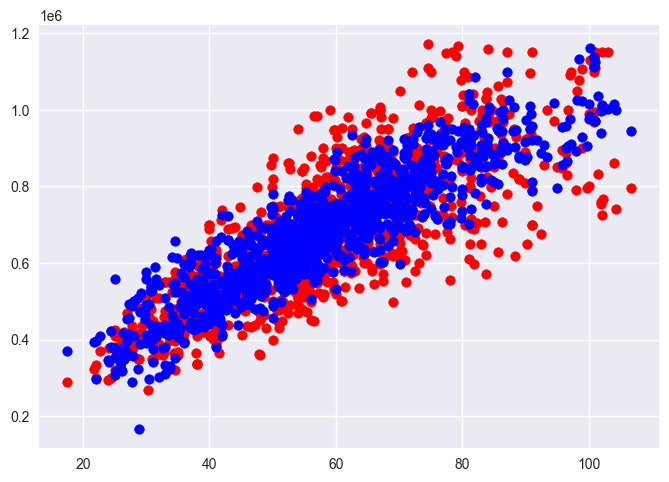

In [97]:
#Visualising the pollynomial regression model results
X_grid=np.arange(min(X_valid["area"]),max(X_valid["area"]),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_valid["area"], y_valid, color='red')
plt.scatter(X_valid["area"], my_pipeline.predict(X_valid),color='blue')

plt.show()

In [98]:
# The coefficient of determination: 1 is perfect prediction
print('MAE: '+ str(mean_absolute_error(y_train, my_pipeline.predict(X_train))))
print("Coefficient of determination: %.2f" % r2_score(y_train, my_pipeline.predict(X_train)))


MAE: 56515.43533726011
Coefficient of determination: 0.81


In [99]:
# The coefficient of determination: 1 is perfect prediction
print('MAE: '+ str(mean_absolute_error(y_valid, my_pipeline.predict(X_valid))))
print("Coefficient of determination: %.2f" % r2_score(y_valid, my_pipeline.predict(X_valid)))

MAE: 60128.262785902814
Coefficient of determination: 0.78


In [ ]:
Ten wynik będzie punktem odniesienia

In [ ]:
# #Przy wzięciu wszystkich kolumn do regresji wynik:

# 1) zbiór testowy:
#     MAE: 62106.07249492351
#     Coefficient of determination: 0.76

# 2) zbiór walidacyjny:
#     MAE: 62291.17999380009
#     Coefficient of determination: 0.76